ANN-PSO for Cubic function approximation using linear activation function: ANN architecture ANN Forward Pass Paricle Swarm Data Execution

In [58]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
#ANN architecture: 
#Number of Neurons per layer:
Input = 1
Hidden = 15
Output = 1
#Number of layers:
Layers = 30

In [60]:
#ANN information pass
def forward_pass(input_X, output_Y, W):

     
    if isinstance(W, Particle):
        W = W.p
        
    for i in range(Layers):
     #weight and bias from input to hidden layers     
        w1 = W[0 : Input * Hidden].reshape((Input, Hidden))
        b1 = W[Input * Hidden:(Input * Hidden) + Hidden].reshape((Hidden, ))
    
   
    #weight and bias from hidden to output
    w4 = W[(Input * Hidden) + Hidden:(Input * Hidden) + Hidden +\
        (Hidden * Output)].reshape((Hidden, Output))
    b4 = W[(Input * Hidden) + Hidden + (Hidden * Output): (Input *\
        Hidden) + Hidden + (Hidden * Output) + Output].reshape((Output, ))

    #infomration pass using linear activation function
    z1 = np.dot(input_X, w1) + b1
    a1 = linear(z1)
    
       
    if Layers > 1:
          for i in range(Layers):
                z1 = np.dot(a1, w1.T) + b1
                a1 = linear(z1)
                
      
            
    z2 = np.dot(a1, w4) + b4
    output_from_outputlayer = linear(z2)
    
     
    #mean squared error   
    mserror1 = (np.power((output_from_outputlayer - output_Y), 2)) # **2
    mserror = (mserror1.sum()/100)
    print(mserror)
    
    
            
    return mserror

In [61]:
class Particle:
   
    def __init__(self, dims, p_range, v_range):
        
        #dims = number of dimensions
        #p= position of the particle in the dimentional space
        #v = velocity of the particle in the dimensional space
        #p_range = range of dimensions 
        #v_range = range of velocities
        
        #let the position and velocity of a praticle be randomly selected from uniform distribution
        self.p = np.random.uniform(p_range[0], p_range[1], (dims, ))
        self.v = np.random.uniform(v_range[0], v_range[1], (dims, )) 
        
        #the best position for any particle can be positive infinity
        self.pbest = float('inf') #-1 #np.inf
        
        #define particles best position based on specified dimensions
        self.pbestpos = np.zeros((dims, ))

In [62]:
#collect MSE for plotting errors
MSE = []

#define swarm and oprtimization function 
class Swarm:
    
    def __init__(self, particle_no, dims, p_range, v_range, alpha_range, component):
        
        #particle_no = number of particles
        #dims = dimensions
        #p_range = range of dimensions 
        #v_range = range of velocities
        #alpha_range = inertia weight range
        #components = cognetive and social components
        
        
        #define the swarm with praticles from Class Particle
        self.p = np.array([Particle(dims, p_range, v_range) for i in range(particle_no)])
        
        #define global best as infinity
        self.gbest =float('inf')
        
        #define global best poition
        self.gbestpos = np.zeros((dims, ))
        
        self.p_range = p_range
        self.v_range = v_range
        
        self.alpha_range = alpha_range
        
        #components
        self.component0 = component[0] #cognetive
        self.component1 = component[1] #social
        self.dims = dims
        
        
     # optimization function    
    def optimize(self, function, input_X, output_Y,  print_step,  iter):
        informants = 6 
        for i in range(iter):
            for particle in self.p:
                fitness = function(input_X, output_Y, particle.p)

                #select the particles best position
                if  fitness < particle.pbest:
                    particle.pbest = fitness
                    particle.pbestpos = particle.p.copy()
                    
            for i in range(informants):
                for particle in self.p:          
                
                #select the global best position    
                 if fitness< self.gbest:
                    self.gbest = fitness
                    self.gbestpos = particle.p.copy()
                    

            for particle in self.p:
               
                alpha = np.random.uniform(self.alpha_range[0], self.alpha_range[1], 1)[0]
                
                #velocity update formula
                particle.v = alpha * particle.v + (self.component0 * np.random.uniform(0.0, 1.0, (self.dims, )) * \
                (particle.pbestpos - particle.p)) + (self.component1 * np.random.uniform(0.0, 1.0, (self.dims, )) \
                * (self.gbestpos - particle.p))
                
                #factor to enable relative velocity update
                epsilon = 0.2
               
                # particle position update  
                particle.p = particle.p + epsilon * particle.v
                
                
              #collect MSE for plotting
            if i % print_step == 0:
                 MSE.append(fitness)
        print("global best (lowest) error: ", self.gbest)

In [63]:
#activation function and data conversion function
def linear(x):
    return x

In [64]:
#X input for which function approximation is carried out
import csv
with open("X_linear.csv", 'r') as f:
    Xin = list(csv.reader(f, delimiter=";"))
import numpy as np
Xin = np.array(Xin[1:], dtype=np.float)
input_X= Xin

In [65]:
#for cubic conversion for cubic approximation
def cubic(x):
    return x**3

In [66]:
output_Y = linear(cubic(input_X))

In [67]:
    #define the PSO hyperparameters
    
    #number of particles
    no_particles = 10
    
    #dimensions 
    dims = (Input * Hidden) + Hidden + (Hidden * Output) + Output
    
    #weight range
    w_range = (-0.01,0.09)
    
    #learning rate range
    l_range = (0.05, 0.25)
    
    #velocity weight range 
    alpha_range = (0.9,0.9)  
    
    #cognetive and social components
    components = (1,3)  
        
    #create swarm object
    s = Swarm(no_particles, dims, w_range, l_range, alpha_range, components)
    
    #define number of itertions
    iterations = 100
    
     #call the optimization function on swarm object 
    s.optimize(forward_pass, input_X, output_Y, 5,iterations)
    
     

0.16434841215040533
0.14689073221113913
0.17072068762982165
0.14937237665898428
0.1550041775164136
0.16490245643264775
0.1680407361582601
0.15151338958209468
0.1560983177411954
0.14698969516120727
8.869097982587613
0.3197420484414557
27.358916207823945
0.5452811852855297
0.8098135799805175
5.318664194625197
14.295469010005707
1.1236204325986563
6.969377155260936
0.47090000445300456
50205.39682586745
339.2625083018143
707155.4807256424
531.4382419399976
388.83526517076587
24181.748827739502
217.01449901107208
5275.041654518746
2618.540060089293
1242.0391075619584
3229.124925299784
30.323968811598156
10780.585533515534
4402.72002691228
183.63771397426254
7831.540125431551
5.160589334298581
44.98368972777243
86.1152352635101
383.5687140581042
0.368587306026771
0.2272717552657487
0.2933001506348764
0.8574077840778759
0.46370274708078063
0.9487621112762298
0.27784532034931814
0.2568146609627686
0.31617901106449525
0.5480861195926598
0.1564109436704666
0.16044376519760015
0.15471272065374478

0.14487919406163774
0.1447803680932411
0.14839811285236384
0.14730576601490333
0.14569607105262625
0.1431860910438815
0.14487914531548618
0.14494369461625722
0.144650982761509
0.14392674484694687
0.14475165865347933
0.14463909434582078
0.14790754937399625
0.1472864765780212
0.14624265458984556
0.14403373427728636
0.14473969199379114
0.1460134430917804
0.144760886164971
0.14331610081942203
0.14477761420040447
0.14480079123036904
0.1461614615453287
0.1455792158241629
0.1461681393159517
0.14573631749110813
0.14451622498094183
0.1466578734559264
0.14482327519822372
0.14341294751557196
0.1447759112905598
0.1450296372557562
0.14401105401126196
0.14385098967805832
0.14500329917614338
0.14761146286425053
0.1444853874175367
0.14617819912607535
0.14477696741694718
0.14352560360400854
0.14477615012504827
0.14530527236061277
0.14325765196728882
0.14325718343805605
0.14396077443197264
0.14902254999691364
0.14451636437743784
0.1448112725719623
0.14470616151202842
0.1441642409192936
0.144595571533764

<ipython-input-68-8eaaf908276e>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  g = graph_ms.add_subplot()


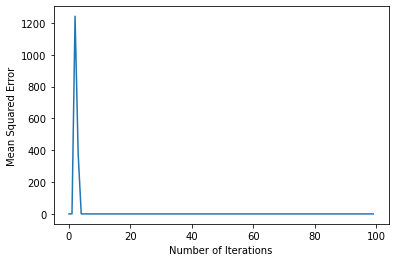

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
graph_ms = plt.figure()
g =plt.xlabel("Number of Iterations")
g =plt.ylabel("Mean Squared Error")
g = graph_ms.add_subplot()
g.plot(MSE)